<a href="https://colab.research.google.com/github/Akarshi2009/Stock-price-prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt


In [ ]:
# Import dataset
data = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)

# Preprocess data

In [ ]:
data.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [ ]:
data.head()


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
#changing object to float type
data["Volume"] = data["Volume"].str.replace(',', '').astype(float)
data["Close"] = data["Close"].str.replace(',', '').astype(float)


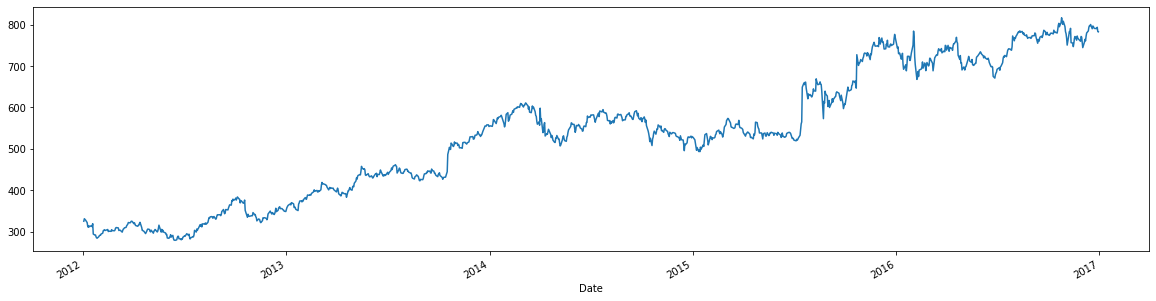

In [ ]:
#plotting open values over year 2012-2016
data['Open'].plot(figsize=(20,5))

In [ ]:
#calculating rolling mean
data.rolling(7).mean().head(15)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


In [ ]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)

In [ ]:
#creating timesteps in order divide data in x_train and y_train
x_train = []
y_train = []
for i in range(60, 1258):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshaping Data in 3D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

**Building** **Model**

In [ ]:
#Building Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

In [ ]:
# first LSTM 
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# second LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# third LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# fourth LSTM layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# output layer
regressor.add(Dense(units = 1))



In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 [==============================] - 11s 107ms/step - loss: 0.1032
Epoch 2/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0063
Epoch 6/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0053
Epoch 10/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0057
Epoch 12/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0039
Epoch 13/100

In [ ]:
#Import test data
data_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)

In [ ]:
real_price = data_test.iloc[:, 1:2].values

In [ ]:
data_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
#converting object type to float type data
data_test["Volume"] = data_test["Volume"].str.replace(',', '').astype(float)

In [ ]:
test_set=data_test['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
#Creating Timesteps
data_total = pd.concat((data['Open'], data_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Evaluating Results
predicted_price = regressor.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

In [ ]:
predicted_price=pd.DataFrame(predicted_price)
predicted_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


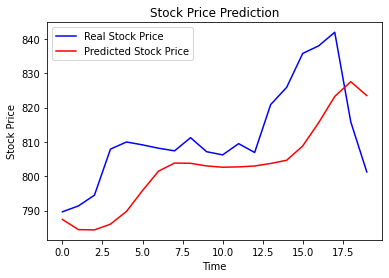

In [ ]:

# Visualising the results
plt.plot(real_price, color = 'blue', label = 'Real Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
